https://www.kaggle.com/datasets/parasharmanas/movie-recommendation-system/data

# Import Libraries and Read Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
movies_df = pd.read_csv('movies.csv')

In [3]:
movies_df.shape

(9742, 3)

In [4]:
ratings = pd.read_csv('ratings.csv')

ratings.shape

(100836, 4)

In [5]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


## Merge the two dataframes

In [7]:
df = movies_df.merge(ratings, on='movieId')

# EDA

## Initial Analysis

In [8]:
# Basic Overview
overview = {
    'Data Dimensions': df.shape,
    'Data Types': df.dtypes,
    'Missing Values': df.isnull().sum()
}

# Summary Statistics for Ratings
ratings_summary = df['rating'].describe()

# Preparing data for Movie Popularity and User Engagement analysis
movie_popularity = df.groupby('title')['rating'].agg(['count', 'mean']).sort_values(by='count', ascending=False)
user_engagement = df.groupby('userId')['rating'].agg(['count', 'mean']).sort_values(by='count', ascending=False)

overview, ratings_summary, movie_popularity.head(), user_engagement.head()


({'Data Dimensions': (100836, 6),
  'Data Types': movieId        int64
  title         object
  genres        object
  userId         int64
  rating       float64
  timestamp      int64
  dtype: object,
  'Missing Values': movieId      0
  title        0
  genres       0
  userId       0
  rating       0
  timestamp    0
  dtype: int64},
 count    100836.000000
 mean          3.501557
 std           1.042529
 min           0.500000
 25%           3.000000
 50%           3.500000
 75%           4.000000
 max           5.000000
 Name: rating, dtype: float64,
                                   count      mean
 title                                            
 Forrest Gump (1994)                 329  4.164134
 Shawshank Redemption, The (1994)    317  4.429022
 Pulp Fiction (1994)                 307  4.197068
 Silence of the Lambs, The (1991)    279  4.161290
 Matrix, The (1999)                  278  4.192446,
         count      mean
 userId                 
 414      2698  3.391957
 599

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   movieId    100836 non-null  int64  
 1   title      100836 non-null  object 
 2   genres     100836 non-null  object 
 3   userId     100836 non-null  int64  
 4   rating     100836 non-null  float64
 5   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 4.6+ MB


In [10]:
df.describe()

,movieId,userId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,19435.295718,326.127564,3.501557,1.205946e+09
std,35530.987199,182.618491,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,1199.000000,177.000000,3.000000,1.019124e+09
50%,2991.000000,325.000000,3.500000,1.186087e+09
75%,8122.000000,477.000000,4.000000,1.435994e+09
max,193609.000000,610.000000,5.000000,1.537799e+09


In [11]:
df.nunique()

movieId       9724
title         9719
genres         951
userId         610
rating          10
timestamp    85043
dtype: int64

In [12]:
df.isna().sum()

movieId      0
title        0
genres       0
userId       0
rating       0
timestamp    0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [14]:
df['genres'].value_counts().nunique()

237

In [15]:
# split genres by | and add as a list

df['genres'] = df['genres'].apply(lambda x:x.split('|'))
                                  
df.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1,4.0,964982703
1,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",5,4.0,847434962
2,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",7,4.5,1106635946
3,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",15,2.5,1510577970
4,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",17,4.5,1305696483


In [16]:
df['genres']

0         [Adventure, Animation, Children, Comedy, Fantasy]
1         [Adventure, Animation, Children, Comedy, Fantasy]
2         [Adventure, Animation, Children, Comedy, Fantasy]
3         [Adventure, Animation, Children, Comedy, Fantasy]
4         [Adventure, Animation, Children, Comedy, Fantasy]
                                ...                        
100831                 [Action, Animation, Comedy, Fantasy]
100832                         [Animation, Comedy, Fantasy]
100833                                              [Drama]
100834                                  [Action, Animation]
100835                                             [Comedy]
Name: genres, Length: 100836, dtype: object

In [17]:
# Extract year of movie from title

# Regular expression to match a year in parentheses at the end of the title
pattern = r'\((\d{4})\)$'

# Extract the year and create a new column
df['movie_year'] = df['title'].str.extract(pattern, expand=False)

# Optionally, remove the year from the title
df['title'] = df['title'].str.replace(pattern, '').str.strip()

df.head()

df['movie_year'] = df['movie_year'].astype(float)

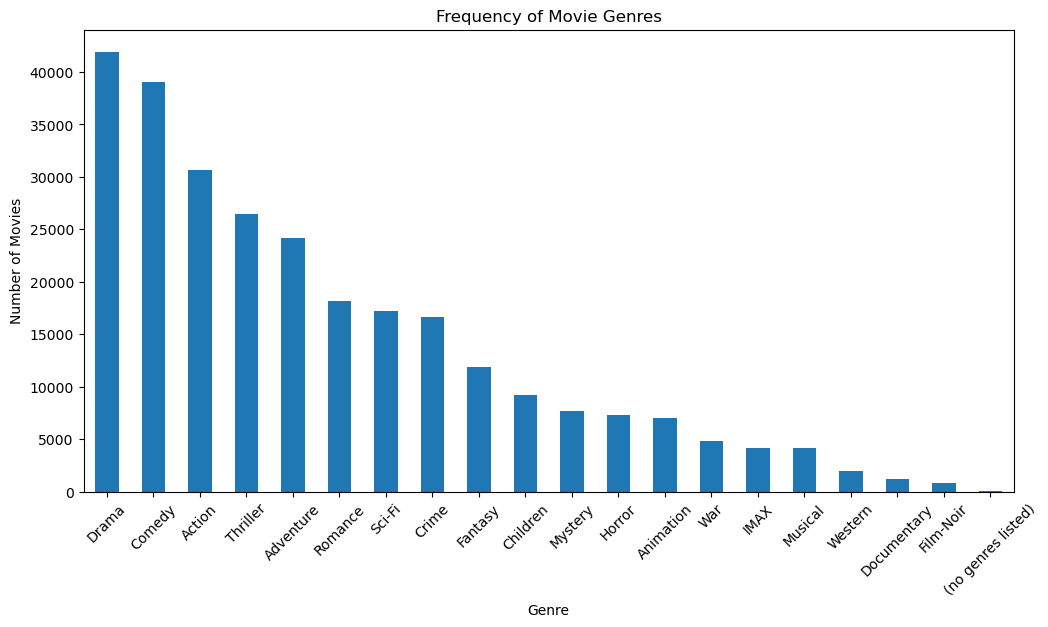

In [18]:
# Break out genres included in list and determine count of each
import matplotlib.pyplot as plt

# Exploding the genres column to have separate row for each genre
exploded_genres = df.explode('genres')

# Counting the occurrences of each genre
genre_counts = exploded_genres['genres'].value_counts()

# Plotting the genre frequencies
plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar')
plt.title('Frequency of Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()


In [19]:
df.dtypes

movieId         int64
title          object
genres         object
userId          int64
rating        float64
timestamp       int64
movie_year    float64
dtype: object

In [20]:
df.head()

,movieId,title,genres,userId,rating,timestamp,movie_year
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1,4.0,964982703,1995.0
1,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",5,4.0,847434962,1995.0
2,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",7,4.5,1106635946,1995.0
3,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",15,2.5,1510577970,1995.0
4,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",17,4.5,1305696483,1995.0


In [21]:
import pandas as pd

# Load your DataFrame (assuming it's already loaded as df)
# df = pd.read_csv('your_data.csv')

# Convert the 'timestamp' column to datetime
df['date'] = pd.to_datetime(df['timestamp'], unit='s')

# Display the first few rows to verify the conversion
print(df.head())


   movieId             title  \
0        1  Toy Story (1995)   
1        1  Toy Story (1995)   
2        1  Toy Story (1995)   
3        1  Toy Story (1995)   
4        1  Toy Story (1995)   

                                              genres  userId  rating  \
0  [Adventure, Animation, Children, Comedy, Fantasy]       1     4.0   
1  [Adventure, Animation, Children, Comedy, Fantasy]       5     4.0   
2  [Adventure, Animation, Children, Comedy, Fantasy]       7     4.5   
3  [Adventure, Animation, Children, Comedy, Fantasy]      15     2.5   
4  [Adventure, Animation, Children, Comedy, Fantasy]      17     4.5   

    timestamp  movie_year                date  
0   964982703      1995.0 2000-07-30 18:45:03  
1   847434962      1995.0 1996-11-08 06:36:02  
2  1106635946      1995.0 2005-01-25 06:52:26  
3  1510577970      1995.0 2017-11-13 12:59:30  
4  1305696483      1995.0 2011-05-18 05:28:03  


In [22]:
df[df['rating'] > 4.5]

,movieId,title,genres,userId,rating,timestamp,movie_year,date
9,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",31,5.0,850466616,1995.0,1996-12-13 08:43:36
12,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",40,5.0,832058959,1995.0,1996-05-14 07:29:19
13,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",43,5.0,848993983,1995.0,1996-11-26 07:39:43
16,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",46,5.0,834787906,1995.0,1996-06-14 21:31:46
19,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",57,5.0,965796031,1995.0,2000-08-09 04:40:31
...,...,...,...,...,...,...,...,...
100787,187593,Deadpool 2 (2018),"[Action, Comedy, Sci-Fi]",98,5.0,1532457913,2018.0,2018-07-24 18:45:13
100790,187593,Deadpool 2 (2018),"[Action, Comedy, Sci-Fi]",249,5.0,1531611534,2018.0,2018-07-14 23:38:54
100791,187593,Deadpool 2 (2018),"[Action, Comedy, Sci-Fi]",305,5.0,1532877841,2018.0,2018-07-29 15:24:01
100801,187595,Solo: A Star Wars Story (2018),"[Action, Adventure, Children, Sci-Fi]",586,5.0,1529899556,2018.0,2018-06-25 04:05:56


# Movie Recommendations

In [23]:
from sklearn.metrics.pairwise import cosine_similarity

# Creating the user-item matrix. Rows will be userIds, columns will be movie titles, and values will be ratings
user_item_matrix = df.pivot_table(index='userId', columns='title', values='rating')

# Replacing NaN values with 0, as we'll calculate cosine similarity
user_item_matrix_filled = user_item_matrix.fillna(0)

# Calculate the cosine similarity matrix (item-item similarity)
item_similarity = cosine_similarity(user_item_matrix_filled.T)  # Transpose to get item-item matrix

# Converting the numpy matrix to a DataFrame for better readability
item_similarity_df = pd.DataFrame(item_similarity, index=user_item_matrix_filled.columns, columns=user_item_matrix_filled.columns)

# Displaying a portion of the similarity matrix
item_similarity_df.iloc[:5, :5]  # Displaying first 5x5 block for brevity


title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997)
title,,,,,
'71 (2014),1.0,0.000000,0.000000,0.000000,0.000000
'Hellboy': The Seeds of Creation (2004),0.0,1.000000,0.707107,0.000000,0.000000
'Round Midnight (1986),0.0,0.707107,1.000000,0.000000,0.000000
'Salem's Lot (2004),0.0,0.000000,0.000000,1.000000,0.857493
'Til There Was You (1997),0.0,0.000000,0.000000,0.857493,1.000000


# Best Approach so Far:

In [ ]:
#### import pandas as pd
import random

# Assuming movies_df is already loaded
# Example: movies_df = pd.read_csv('path_to_your_movies.csv')

def get_user_preferences(movies_df):
    # Get movie period preferences
    start_year = int(input("Enter the start year of your preferred movie period: "))
    end_year = int(input("Enter the end year of your preferred movie period: "))

    # Get genre preferences
    print("Please enter your top 3 favorite genres from the following list:")
    all_genres = set(genre for genre_list in movies_df['genres'].str.split('|') for genre in genre_list)
    print(', '.join(sorted(all_genres)))

    top_genres = []
    while len(top_genres) < 3:
        genre = input(f"Enter genre {len(top_genres) + 1}: ").strip()
        if genre in all_genres and genre not in top_genres:
            top_genres.append(genre)
        else:
            print("Invalid genre or duplicate entry. Please try again.")
    
    return start_year, end_year, top_genres

def get_user_ratings(filtered_movies, min_ratings=5):
    print("\nPlease rate at least 5 movies on a scale from 1 to 5. If you haven't seen a movie, just press Enter.")

    sampled_movies = filtered_movies['title'].sample(n=min(len(filtered_movies), min_ratings * 10)).tolist()

    ratings = {}
    while len(ratings) < min_ratings:
        for movie in sampled_movies:
            if movie in ratings:
                continue  # Skip already rated movies

            rating_input = input(f"Rating for '{movie}': ").strip()

            if rating_input == '':
                continue  # Skip unrated movies

            try:
                rating = float(rating_input)
                if 1 <= rating <= 5:
                    ratings[movie] = rating
                else:
                    print("Please enter a number between 1 and 5.")
            except ValueError:
                print("Invalid input. Please enter a valid number or press Enter to skip.")

            if len(ratings) >= min_ratings:
                return ratings

        # Re-sample additional movies if needed
        additional_movies = filtered_movies[~filtered_movies['title'].isin(sampled_movies)]['title'].sample(
            n=min(len(filtered_movies) - len(sampled_movies), min_ratings)).tolist()
        sampled_movies.extend(additional_movies)

    return ratings

# Extract year from the movie title
movies_df['year'] = movies_df['title'].str.extract(r'\((\d{4})\)').astype(float)

# Get user preferences
start_year, end_year, top_genres = get_user_preferences(movies_df)

# Filter movies based on year range and genres
filtered_movies = movies_df[
    (movies_df['year'].between(start_year, end_year)) &
    (movies_df['genres'].str.contains('|'.join(top_genres)))
]

# Get user ratings
user_ratings = get_user_ratings(filtered_movies)
print("\nYour ratings:")
for movie, rating in user_ratings.items():
    print(f"{movie}: {rating}")
    
    
def make_recommendations(user_ratings, item_similarity_df, num_recommendations=5):
    # Convert user_ratings to a Series for easier processing
    user_ratings_series = pd.Series(user_ratings)
    
    # Initialize a Series to store the total weighted similarity score of each movie
    total_scores = pd.Series(dtype='float64')

    # Iterate through movies rated by the user and calculate weighted scores
    for movie, rating in user_ratings_series.items():
        # Skip if the movie is not in the similarity matrix
        if movie not in item_similarity_df.columns:
            continue

        # Get similarity scores for the movie
        sim_scores = item_similarity_df[movie]

        # Weighted similarity scores
        weighted_scores = sim_scores * rating

        # Add to the total scores, summing up the weights
        total_scores = total_scores.add(weighted_scores, fill_value=0)

    # Remove movies the user has already rated
    total_scores = total_scores.drop(user_ratings.keys(), errors='ignore')

    # Get top recommendations
    top_recommendations = total_scores.sort_values(ascending=False).head(num_recommendations).index.tolist()

    return top_recommendations

# Example usage
# Assuming 'item_similarity_df' is your precomputed item-item similarity matrix
# and 'user_ratings' is a dictionary containing user's movie ratings
recommended_movies = make_recommendations(user_ratings, item_similarity_df, 5)
print("\n Recommended Movies:")
for movie in recommended_movies:
    print(movie)



Enter the start year of your preferred movie period:  1995
Enter the end year of your preferred movie period:  2015


Please enter your top 3 favorite genres from the following list:
(no genres listed), Action, Adventure, Animation, Children, Comedy, Crime, Documentary, Drama, Fantasy, Film-Noir, Horror, IMAX, Musical, Mystery, Romance, Sci-Fi, Thriller, War, Western


Enter genre 1:  Sci-Fi
Enter genre 2:  Thriller
Enter genre 3:  IMAX



Please rate at least 5 movies on a scale from 1 to 5. If you haven't seen a movie, just press Enter.


Rating for 'Ledge, The (2011)':  
Rating for 'Battle Planet (2008)':  
